<a href="https://colab.research.google.com/github/pauloday/artbot/blob/main/Artbot_Studio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artbot Studio
by Paul O'Day

>Based on https://colab.research.google.com/drive/1L8oL-vLJXVcRzCFbPwOoMkPKJ8-aYdPN \

This is the runner for Artbot Studio, which will run in a different window. Here's how to run it:

1.   Go to the 'Runtime' menu, and select 'Change runtime type'. Make sure the accelerator is set to 'GPU'

2.   Run the init cell below by pressing the play button. You'll only have to run this once per session, even after you restart the runtime. It'll take a little while, it has to download at least 2GB of data to Google's servers, but the connection is really fast.

3.   After it's done downloading, run the next cell to upload your run file. You'll have to authenticate for Google Drive. Output will be saved in `Gaillery/`. There will also sometimes be a folder called '.ipynb_checkpoints' generated in your drive/gallery folder. This is safe to delete, and may not even be generated most of the time.

4.   Have fun!


In [1]:
print('Collecting init files...')
!git clone --branch main https://github.com/pauloday/artbot
!mv artbot/src/* .
print('Initializing...')
!./artbot/init.sh
import sys
sys.path.append('./taming-transformers')


Cloning into 'artbot'...
remote: Enumerating objects: 532, done.
remote: Counting objects: 100% (532/532), done.
remote: Compressing objects: 100% (384/384), done.
remote: Total 532 (delta 325), reused 321 (delta 142), pack-reused 0
Receiving objects: 100% (532/532), 291.88 KiB | 5.21 MiB/s, done.
Resolving deltas: 100% (325/325), done.
Initializing...
Cloning into 'CLIP'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 133 (delta 18), reused 26 (delta 13), pack-reused 91
Receiving objects: 100% (133/133), 8.82 MiB | 20.62 MiB/s, done.
Resolving deltas: 100% (58/58), done.
Cloning into 'taming-transformers'...
remote: Enumerating objects: 779, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 779 (delta 0), reused 14 (delta 0), pack-reused 756
Receiving objects: 100% (779/779), 202.24 MiB | 23.87 MiB/s, done.
Resolving d

If you want to stop a run, use the "Restart Runtime" option in the Runtime menu. Doing so won't require you to rerun the setup, you can just start a run right away. If a run doesn't exit succesfully (e.g. out of memory error), or you change a file you just ran, you'll need to restart the runtime. If you write a long video, the progress bar may turn red and stop before it's done. This doesn't seem to be a problem, it's just a bug in the video writing library I use.

Running "seed_chess_lib" on device 0, saving output at /content/drive/MyDrive/Gaillery/Neon Library Demo/seed_chess_lib
Using device: cuda:0 vqgan_imagenet_f16_1024.ckpt
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from vqgan_imagenet_f16_1024.ckpt


  0%|          | 0/200 [00:00<?, ?it/s]

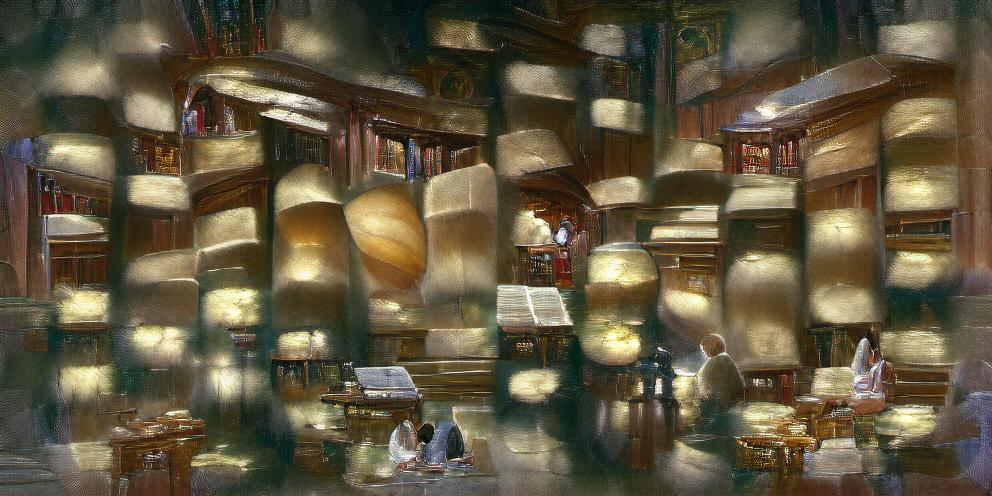

**Prompts:** ['in a sacred library by James Gurney']<br>**Image Prompts:** None<br>**Output:** /content/drive/MyDrive/Gaillery/Neon Library Demo/seed_chess_lib/200_1000x500-f7af54c65ad7b87e9070a30a2f5049e7.jpg<br>**All prompts:** {0: ['in a sacred library by James Gurney']}<br>**All image prompts:** None

%05d.jpg: 0 frames [00:00, ? frames/s]

In [1]:
from os import remove, path
from artbot import Artbot
from google.colab import files
from IPython import display
from tqdm.notebook import tqdm
from google.colab import drive
from pathlib import Path
from shutil import copyfile
# comment this line out if you don't want google drive
drive.mount('/content/drive')
gallery = '/content/drive/MyDrive/Gaillery'
#gallery = '/Gaillery'
#@markdown If this is enabled, the file in your gallery folder will be used.
#@markdown The gallery folder is in your Google drive, called 'Gaillery'.
#@markdown If the file doesn't exist, Artbot will create it and exit.
#@markdown If you don't have a 'scratch.yml' file, one will be created with some demos and documentation.
use_gallery = True #@param {type:"boolean"}
image_pane = display.display(display_id=True)
image_panes = {}
status_panes = {}
def pane(device, typ):
    pane_dict = image_panes if typ == 'image' else status_panes
    if not device in pane_dict.keys():
        pane_dict[device] = display.display(display_id=True)
    return pane_dict[device]

def image_writer(img, dev, video=False):
    if not video:
        pane(dev, 'image').update(display.Image(img))

def status_writer(status, dev):
    st_pane = pane(dev, 'status')
    if not status:
        #print('c')
        display.clear_output()
    else:
      st_pane.update(display.Markdown(status))

bot = lambda yaml: Artbot(
    yaml,
    image_writer=image_writer,
    status_writer=status_writer,
    gallery=gallery,
    tqdm=tqdm
)

if use_gallery:
    infile = 'Demo.yml' #@param {type:"string"}
    pathstr = f'{gallery}/{infile}'
    if path.exists(pathstr):
        bot = bot(open(pathstr, 'rb').read())
        bot.run()
    elif infile == 'Demo.yml':
        copyfile('artbot/demo.yml', pathstr)
        print(f'Running demo/documentaiton at {pathstr}')
        bot = bot(open(pathstr, 'rb').read())
        bot.run()
    else:
        Path(pathstr).touch()
        print(f'Created empty file at {pathstr}')
else:
    #@markdown If use_gallery isn't checked, it'll ask you to upload a file
    uploaded = files.upload()
    for fn in uploaded.keys():
        bot = bot(uploaded[fn])
        bot.run()

Send any bugs, suggestions, cool arts, or anything else interesting to artbot@pauloday.com.